Geographical Data Visualization (15 points)


 In this homework, you will visualize bike trip data as a heat map with pandas and geopandas. Feel free to
 make ready use of online resources to familiarize yourself either Python packages. 
 
 You will be working with 3 datasets:
 
 Bike trip data for July 2020: datasets\202007-divvy-tripdata.csv
 
 Bike station locations: datasets\station-locations.csv
 
 Community areas from the city of Chicago: datasets\chicago-community-areas.geojson

Data Pre-Processing (3/15 points)


 Some of the data in these datasets are not in the format we want and may be missing important data points.
 We're going to change that by pre-processing each dataset to ensure that they're in the proper format.
 Complete the tasks below:
 1. Bike trip Pre-Processing (1 point): Within the bike trip data that we loaded (trips_df), get rid of
 missing (NaN) start and end station IDs, and convert those columns to integer columns. Make sure the
 modified dataframe is referenced as trips_pr_df.
 2. Community Areas Pre-processing (1 point): Within the geojson data for the Chicago community
 areas (community_df), rename the column area_numbe to area_number, and convert that column to
 an integer column. Make sure to reference the modified geojson data as community_pr_df.
 3. Stations Pre-processing (1 point): Within the bike station location data (stations_df), convert it to a
 GeoDataFrame and set its geometry to the point specified by the longitude and latitude pair. Make sure
 to reference the modified data as stations_pr_df.

 Hint: use the geopandas.points_from_xy() method to construct longitudinal and latitudinal points and
 specify the geometry arg when constructing the GeoDataFrame.
 Grading Metric: We'll run your code to generate trips_pr_df, community_pr_df, and stations_pr_df.
 Points are assigned based on how accurately the implementation follows the instructions. We'll use a code
 implementation of our own to test whether the changes have been appropriately made to each dataframe.

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [3]:
# Load the bike trip data
trips_df = pd.read_csv('202007-divvy-tripdata.csv')

In [4]:
trips_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member


In [5]:
# Pre-processing the bike trip data
# Remove rows where start or end station IDs are missing
trips_df.dropna(subset=['start_station_id', 'end_station_id'], inplace=True)

# Convert start and end station IDs to integer
trips_df['start_station_id'] = trips_df['start_station_id'].astype(int)
trips_df['end_station_id'] = trips_df['end_station_id'].astype(int)

# Renaming the modified dataframe as requested
trips_pr_df = trips_df

# Display the first few rows to verify the changes
trips_pr_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.911722,-87.626804,41.907993,-87.631501,member


In [6]:
# Load the Chicago community areas GeoJSON data
community_df = gpd.read_file('chicago-community-areas.geojson')

In [7]:
community_df.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


In [8]:
# Pre-processing the community areas data
# Rename the column 'area_numbe' to 'area_number'
community_df.rename(columns={'area_numbe': 'area_number'}, inplace=True)

# Convert the 'area_number' column to an integer
community_df['area_number'] = community_df['area_number'].astype(int)

# Renaming the modified GeoDataFrame as requested
community_pr_df = community_df

# Display the first few rows to verify the changes
community_pr_df.head()

,community,area,shape_area,perimeter,area_num_1,area_number,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


In [9]:
# Load the bike station locations data from the specified CSV file
stations_df = pd.read_csv('station-locations.csv')

In [10]:
stations_df.head()

,has_kiosk,lat,lon,external_id,rental_uris,short_name,rental_methods,electric_bike_surcharge_waiver,eightd_station_services,name,...,station_id,station_type,eightd_has_key_dispenser,legacy_id,region_id,region_code,address,rack_model,dockless_bikes_parking_zone_capacity,client_station_id
0,True,41.876511,-87.620548,a3a36d9e-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15541,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Buckingham Fountain,...,2,classic,False,2,NaN,NaN,NaN,NaN,NaN,NaN
1,True,41.867226,-87.615355,a3a37378-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15544,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Shedd Aquarium,...,3,classic,False,3,NaN,NaN,NaN,NaN,NaN,NaN
2,True,41.856268,-87.613348,a3a378ca-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15545,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Burnham Harbor,...,4,classic,False,4,NaN,NaN,NaN,NaN,NaN,NaN
3,True,41.874053,-87.627716,a3a37e26-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",SL-007,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],State St & Harrison St,...,5,classic,False,5,NaN,NaN,NaN,NaN,NaN,NaN
4,True,41.886976,-87.612813,a3a38363-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",KA1503000064,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Dusable Harbor,...,6,classic,False,6,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Convert the stations DataFrame to a GeoDataFrame
# Creating a geometry column from the longitude and latitude pairs

stations_pr_df = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['lon'], stations_df['lat'])
)

# Display the first few rows of the stations_pr_df to verify the conversion
stations_pr_df.head()

,has_kiosk,lat,lon,external_id,rental_uris,short_name,rental_methods,electric_bike_surcharge_waiver,eightd_station_services,name,...,station_type,eightd_has_key_dispenser,legacy_id,region_id,region_code,address,rack_model,dockless_bikes_parking_zone_capacity,client_station_id,geometry
0,True,41.876511,-87.620548,a3a36d9e-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15541,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Buckingham Fountain,...,classic,False,2,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.62055 41.87651)
1,True,41.867226,-87.615355,a3a37378-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15544,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Shedd Aquarium,...,classic,False,3,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.61536 41.86723)
2,True,41.856268,-87.613348,a3a378ca-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15545,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Burnham Harbor,...,classic,False,4,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.61335 41.85627)
3,True,41.874053,-87.627716,a3a37e26-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",SL-007,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],State St & Harrison St,...,classic,False,5,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.62772 41.87405)
4,True,41.886976,-87.612813,a3a38363-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",KA1503000064,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Dusable Harbor,...,classic,False,6,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.61281 41.88698)


 Geographical Visualization (12/15 points)
 
 
 We will now analyze the relationship between community area, trips, and station location. Some of these tasks
 involve merging DataFrames and GeoDataFrames in a manner similar to SQL table joins. We will also visualize
 one of these relationships as a spatial heat map.
 

 1. Spatial Join (2 points): Given points from station locations, we want to find out which community
 areas those points are in. This can be accomplished using a sjoin in geopandas. After joining the two
 datasets, you should be able to find the area_number for each station_id. Save your joined results as
 station_community_df. Hint: If you see an error about CRS of frames not matching, you can set the
 crs parameter of the GeoDataFrame to the same as the community areas.


In [12]:
# Ensure both GeoDataFrames have the same CRS
stations_pr_df.set_crs(community_pr_df.crs, inplace=True)

# Perform the spatial join
station_community_df = gpd.sjoin(stations_pr_df, community_pr_df, how="left", op='within')

# This will add the area_number from the community areas to each station record in station_community_df
# Display the first few rows to verify the join
station_community_df.head()

D:\annaconda\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,has_kiosk,lat,lon,external_id,rental_uris,short_name,rental_methods,electric_bike_surcharge_waiver,eightd_station_services,name,...,index_right,community,area,shape_area,perimeter,area_num_1,area_number,comarea_id,comarea,shape_len
0,True,41.876511,-87.620548,a3a36d9e-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15541,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Buckingham Fountain,...,37.0,LOOP,0,46335565.4586,0,32,32.0,0,0,39428.6729962
1,True,41.867226,-87.615355,a3a37378-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15544,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Shedd Aquarium,...,33.0,NEAR SOUTH SIDE,0,49769639.4541,0,33,33.0,0,0,45053.1651038
2,True,41.856268,-87.613348,a3a378ca-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15545,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Burnham Harbor,...,33.0,NEAR SOUTH SIDE,0,49769639.4541,0,33,33.0,0,0,45053.1651038
3,True,41.874053,-87.627716,a3a37e26-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",SL-007,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],State St & Harrison St,...,37.0,LOOP,0,46335565.4586,0,32,32.0,0,0,39428.6729962
4,True,41.886976,-87.612813,a3a38363-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",KA1503000064,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Dusable Harbor,...,37.0,LOOP,0,46335565.4586,0,32,32.0,0,0,39428.6729962


 2. Add Community Areas to Trips (4 points): Use the updated dataframe from the previous part with
 the bike trip dataset to add columns specifying the start and end community area numbers
 (start_ca_num and end_ca_num) for each trip. Remove any entries in your final results that have NaN
 values for either start_ca_num or end_ca_num. Save your results in trips_community_df. Hint: Use
 the start_station_name and end_station_name and the joined dataframe from the previous part to
 set these. You could try to use two normal pandas merges (one for start and one for end) as opposed to
 the sjoin method.

In [13]:
# Ensure that station_community_df contains a unique mapping of station_id to area_number
station_community_df_unique = station_community_df[['station_id', 'area_number']].drop_duplicates()

# Merge for Start Community Area
trips_with_start_ca = pd.merge(
    trips_pr_df, 
    station_community_df_unique, 
    left_on='start_station_id', 
    right_on='station_id', 
    how='left'
)
trips_with_start_ca.rename(columns={'area_number': 'start_ca_num'}, inplace=True)

In [14]:
trips_with_start_ca.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,station_id,start_ca_num
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.906866,-87.626217,41.906724,-87.634830,member,180.0,8.0
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.943670,-87.648950,41.984045,-87.660274,member,299.0,6.0
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.932588,-87.636427,41.936497,-87.647539,casual,329.0,7.0
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.890762,-87.631697,41.918306,-87.636282,casual,181.0,8.0
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.911722,-87.626804,41.907993,-87.631501,member,268.0,7.0


In [15]:
# Merge for End Community Area
trips_with_end_ca = pd.merge(
    trips_with_start_ca, 
    station_community_df_unique, 
    left_on='end_station_id', 
    right_on='station_id', 
    how='left'
)
trips_with_end_ca.rename(columns={'area_number': 'end_ca_num'}, inplace=True)


In [16]:
trips_with_start_ca.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,station_id,start_ca_num
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.906866,-87.626217,41.906724,-87.634830,member,180.0,8.0
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.943670,-87.648950,41.984045,-87.660274,member,299.0,6.0
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.932588,-87.636427,41.936497,-87.647539,casual,329.0,7.0
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.890762,-87.631697,41.918306,-87.636282,casual,181.0,8.0
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.911722,-87.626804,41.907993,-87.631501,member,268.0,7.0


In [17]:
# Cleanup: Remove rows with NaN in start_ca_num or end_ca_num
trips_community_df = trips_with_end_ca.dropna(subset=['start_ca_num', 'end_ca_num'])

# Drop extra station_id columns resulting from merges
trips_community_df.drop(columns=['station_id_x', 'station_id_y'], inplace=True)

# Display the first few rows to verify the result
trips_community_df.head()

C:\Users\gxy\AppData\Local\Temp\ipykernel_16564\3847885979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_community_df.drop(columns=['station_id_x', 'station_id_y'], inplace=True)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_ca_num,end_ca_num
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.906866,-87.626217,41.906724,-87.634830,member,8.0,8.0
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.943670,-87.648950,41.984045,-87.660274,member,6.0,77.0
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.932588,-87.636427,41.936497,-87.647539,casual,7.0,6.0
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.890762,-87.631697,41.918306,-87.636282,casual,8.0,7.0
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.911722,-87.626804,41.907993,-87.631501,member,7.0,8.0


 3. Explaining the Joins (2 points): In a short (no more than a paragraph) description, please briefly
 answer the following inquiries. You can write either in Markdown or in code comments in the space
 provided in the notebook file.
    1. For each join conducted in steps 1 and 2, what was your rationale for using these particular join
 types?
    2. Did your final trips_community_df end up a different size from the original trips_pr_df
 dataframe? If so, what do you think caused this difference in size?

Answer for A:
    For Step 1, the spatial join  was chosen because it is uniquely suited to geographic data, as it allows for the identification of which geographic area (a polygon) contains each point, a task that traditional dataframe merges cannot accomplish. This method ensures each station is accurately mapped to a community area based on its spatial coordinates, essential for any geographic analysis. For Step 2, traditional pandas merge operations were used instead of a spatial join because the task only asks simply to linki data based on common identifiers (station IDs and their associated community area numbers). Each bike trip, characterized by start and end stations, needed to be augmented with the community area information obtained from Step 1. Using merge is effective in combining datasets based on shared values.

Answer for B:
    Yes, the final trips_community_df likely ended up a different size compared to the original trips_pr_df dataframe due to the removal of entries that lacked start or end community area numbers (start_ca_num or end_ca_num). This discrepancy arises because some bike trips might start or end at stations that couldn't be matched with a community area, possibly due to missing or incorrect station location data, stations being located outside the defined community areas, or inaccuracies in the spatial join process. Additionally, the data cleaning step, which involves dropping rows with NaN values in the new community area columns, further filters out trips that cannot be accurately analyzed within the spatial context of Chicago's community areas. This filtering is crucial for maintaining the integrity and reliability of spatial analyses conducted with the dataset.

 4. Visualize Station Distribution (4 points): We want to understand which community areas have bike
 stations. Using geopandas, generate a plot of the number of stations per community area. This can be
 accomplished by aggregating the stations by community area. Then use the plot() command to
 generate a chloropleth map. Examples of possible chloropleth maps are provided below. You are
 allowed to define a colormap for your chloropleth map via the cmap parameter. 
 
 Hint(s): If you end up
 using groupby, you should recreate the GeoDataFrame before plotting. If your plot appears less like a
 geographic map and more like a collection of dots, make sure check that the geometry of your
 GeoDataFrame uses MultiPolygon rather than Point; this will depend largely on how you joined the
 stations_community_df.

In [18]:
import matplotlib.pyplot as plt

# Step 1: Aggregate stations by community area
station_counts = station_community_df.groupby('area_number').size().reset_index(name='station_count')

In [19]:
# Step 2: Use .dropna() to remove rows with any NaN values
community_stations = community_pr_df.merge(station_counts, on='area_number', how='left').dropna()

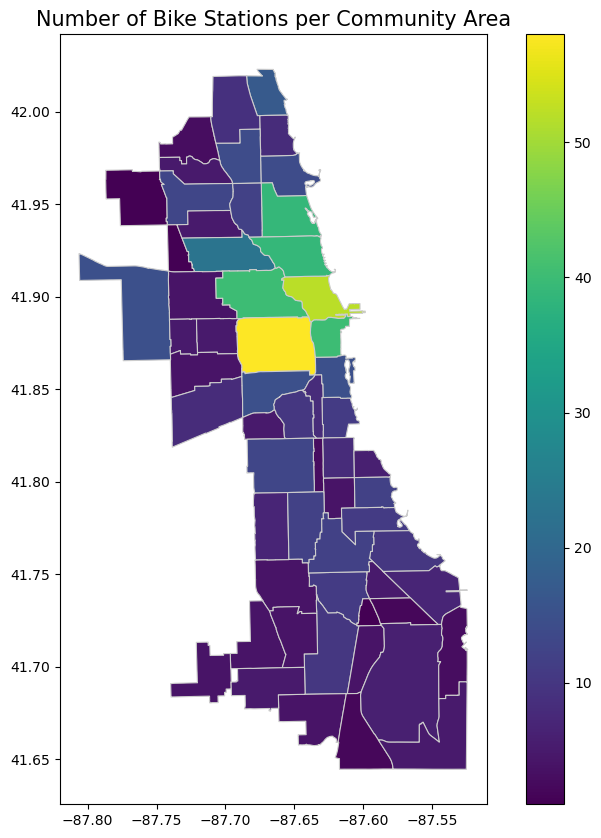

In [20]:
# Step 3: Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
community_stations.plot(column='station_count', legend=True, linewidth=0.8, ax=ax, edgecolor='0.8')

# Customize title and turn off axis
ax.set_title('Number of Bike Stations per Community Area', fontdict={'fontsize': '15', 'fontweight': '3'})

# Instead of turning off the axis, adjust ticks for a cleaner look
ax.tick_params(axis='both', which='both', bottom=True, left=True, labelbottom=True, labelleft=True)

plt.show()